<a href="https://colab.research.google.com/github/silva-felipe/Imersao_dados_alura/blob/main/Aula03(desafios)_imersao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

In [2]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')


In [14]:
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
dados.columns = [coluna.replace('-', '') for coluna in dados.columns]

# Desafio 01 e 02: Criar tabelas de frequência com pandas.groupby() e normalizar os dados usando o pandas.groupby()

In [4]:
groupby_pd = pd.DataFrame(dados.groupby(['dose','tempo'])['tratamento'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
groupby_pd

tratamento
dose tempo tratamento             
D1   24    com_droga        92.25%
           com_controle      7.75%
     48    com_droga        92.12%
           com_controle      7.88%
     72    com_droga        92.14%
           com_controle      7.86%
D2   24    com_droga        92.15%
           com_controle      7.85%
     48    com_droga        92.17%
           com_controle      7.83%
     72    com_droga        92.15%
           com_controle      7.85%

# Desafio 02: Normalizar o crosstab pela coluna.

In [5]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index').mul(100).round(2).astype(str) + '%'

tratamento com_controle com_droga
dose tempo                       
D1   24           7.75%    92.25%
     48           7.88%    92.12%
     72           7.86%    92.14%
D2   24           7.85%    92.15%
     48           7.83%    92.17%
     72           7.85%    92.15%

# Desafio 03: Explorar outros agregadores.

In [6]:
print('A função np.sum retorna a soma dos valores'.upper())
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc=np.sum)

A FUNÇÃO NP.SUM RETORNA A SOMA DOS VALORES


tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

In [7]:
print('A função np.mean retorna a média dos valores'.upper())
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc=np.mean)

A FUNÇÃO NP.MEAN RETORNA A MÉDIA DOS VALORES


tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [8]:
print('A função np.std retorna o Desvio Padrão dos valores'.upper())
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc=np.std)

A FUNÇÃO NP.STD RETORNA O DESVIO PADRÃO DOS VALORES


tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [9]:
print('A função np.min retorna o Valor mínimo dos valores'.upper())
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc=np.min)

A FUNÇÃO NP.MIN RETORNA O VALOR MÍNIMO DOS VALORES


tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [10]:
print('A função np.max retorna o Valor maximo dos valores'.upper())
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc=np.max)

A FUNÇÃO NP.MAX RETORNA O VALOR MAXIMO DOS VALORES


tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [11]:
print('A função np.sum retorna a Mediana dos valores'.upper())
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc=np.median)

A FUNÇÃO NP.SUM RETORNA A MEDIANA DOS VALORES


tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

# Desafio 04: Explorar o melt.

In [34]:
pd.melt(dados, id_vars=['g0'], value_vars=['tempo','dose'])

,g0,variable,value
0,1.0620,tempo,24
1,0.0743,tempo,72
2,0.6280,tempo,48
3,-0.5138,tempo,48
4,-0.3254,tempo,72
...,...,...,...
47623,0.1394,dose,D2
47624,-1.3260,dose,D2
47625,0.3942,dose,D2
47626,0.6660,dose,D1


# Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

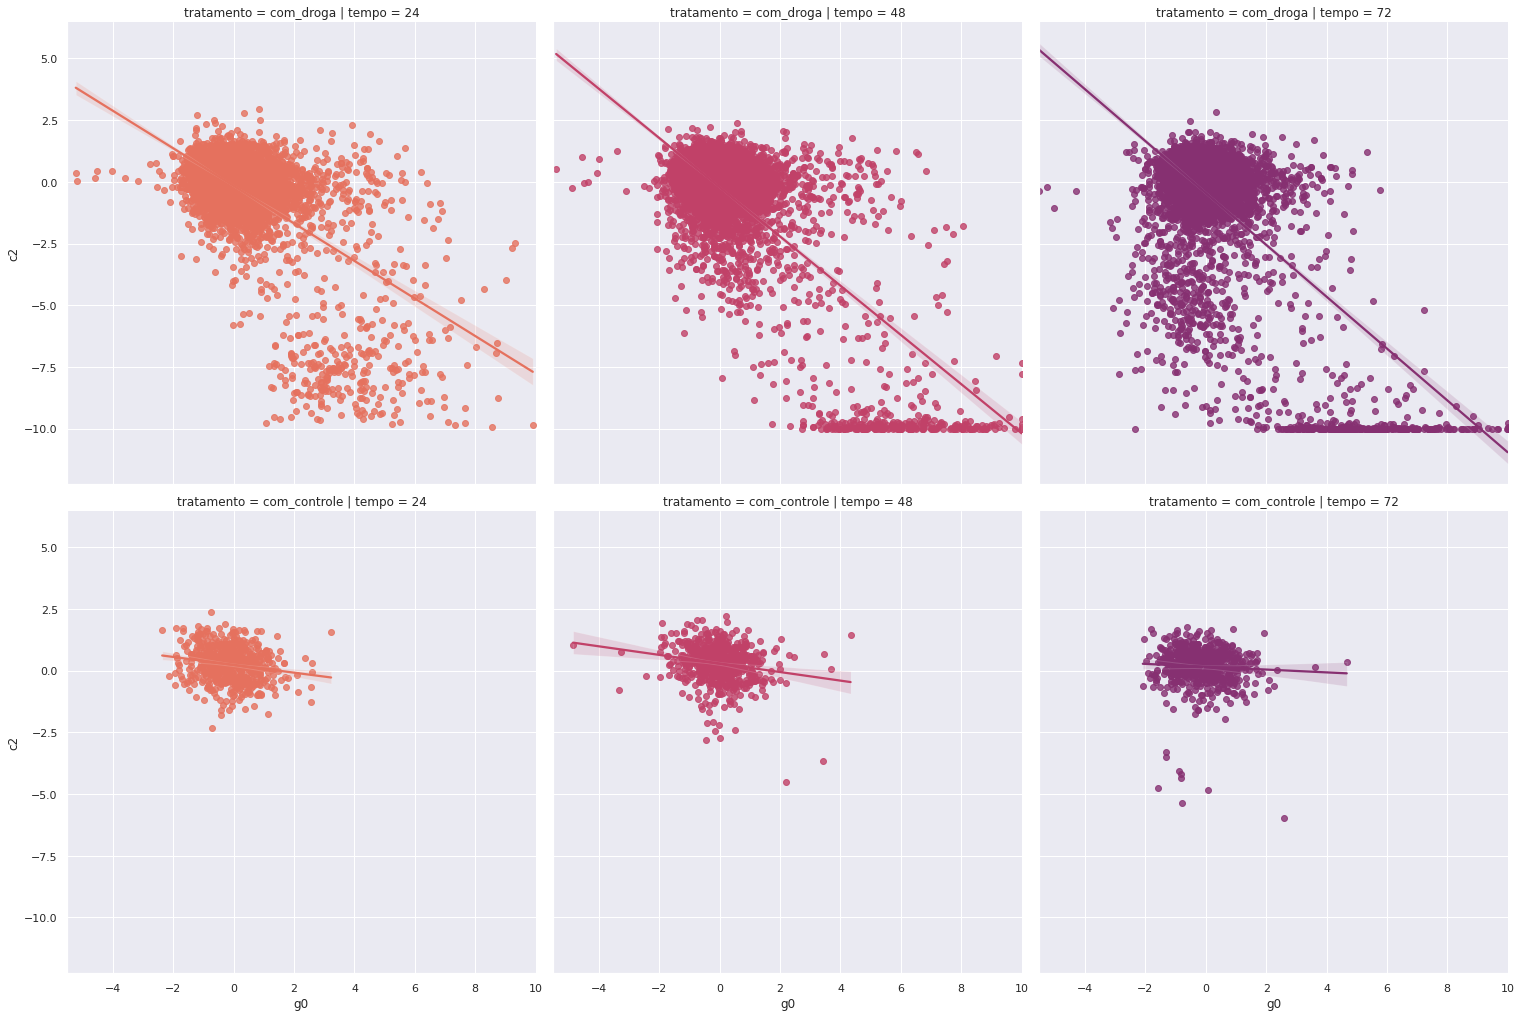

In [93]:

ax = sns.lmplot(x='g0', y = 'c2', data=dados, hue='tempo', col='tempo', row='tratamento', palette='flare', height=7, aspect=1)
plt.show()


O gráfico de de dispersão acima mostra a tendência na da viabilidade celular da célula (c2) em relação a expressão gênica do gene (g0) para diferentes drogas quando exposto a diferentes tempos. Sendo assim podemos observar que nos maiores tempos de exposição existe uma queda no número de células viáveis, isso pode estar ocorrendo também pelo nível de dosagem que as células foram submetidas.
Podemos ainda observar que a grande parte das células continuam viáveis que a expressao do gene (g0) tem uma influência significativa na viabilidade da célula em questão, podendo então inferir que a correlação entre a super expressão ou repressão deste gene e a viabilidade celular existe. Principalmente quando observado os contoles.

#Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)


In [94]:
corr = dados.loc[:,'g0':'g60'].corr()

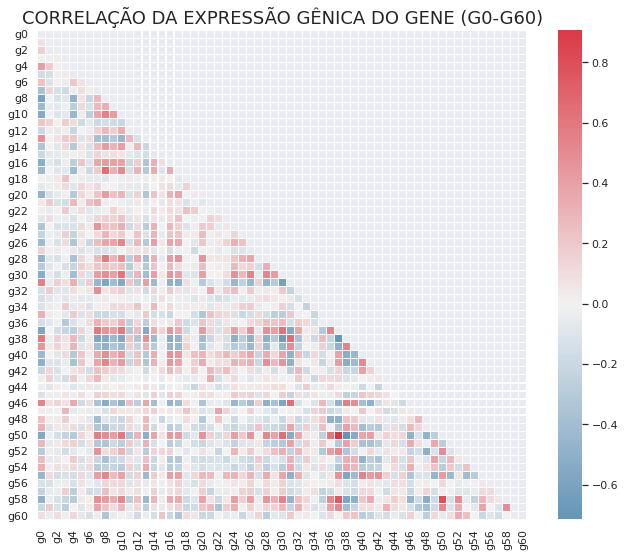

In [114]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": 1})

ax.set_title('Correlação da expressão gênica do gene (g0-g60)'.upper(), fontsize=18)

plt.show()

>Eu manipulei a funcão cbar_kws, para que a escala ocupe toda a lateral do gráfico. 

>Adicionei um título utilizando o set_title

>Alterei o diverging_palette para deixar mais evidentes os genes que se correlacionam

>Alterei a grossura das linhas em linewidths

#Desafio 07: Resumo do que você aprendeu com os dados

>Verifiquei que podemos criar novas tabelas para mostrar a frequencia tanto utilizando o crosstab quanto o grouopy que possuem formas um pouco diferente entre si para realizar praticamente a mesma função.

>Podemos utilizar o numpy para agregar os valores de interesse e posteriormente gerar informações mais acertivas sobre o objeto de estudo.

>O melt(), também é uma funcão interessante para filtragem de dados com alto grau de especificidade.

>Os gráficos de dispersão e de heatmap, são ótimas ferramentas para poder a correlação entre os dados estudados.
